# ScientISST MOVE: Getting Started in CSV format
Please cite:
_Saraiva et al., ScientISST MOVE: Annotated Multimodal Naturalistic Dataset Recorded During Everyday Life Activities Using Wearable Devices, Scientific Data (2024)_

**It is recommended you run this notebook in a virtual environment.**
On the terminal:

1. Create new virtual environment: `python -m venv venv`
2. Activate it: `source venv/bin/activate` on Linux/MacOS or `venv\Scripts\activate` on Windows
3. Associate this to a Jupyter kernel: `ipython kernel install --user --name=venv`
4. Restart the notebook and change the kernel to `venv` under the Kernel tab.

See full guide [here](https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/).

## A. Download Dataset
This might take a while...
Bellow, you might need to change to pip3 or pip, depending on your system.

In [1]:
!pip3 install wget
import wget, zipfile, os, ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Download dataset in CSV format
url = 'https://zenodo.org/records/10114104/files/csv.zip?download=1'
filename = wget.download(url)  # into to the current directory

# Decompress zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if file.startswith('csv/'):
            zip_ref.extract(file)

# Delete zip file
os.remove(filename)

100% [....................................................................] 2211710425 / 2211710425

## B. Install Pandas
We'll use Pandas DataFrames to read the CSV files.
Bellow, you might need to change to pip3 or pip, depending on your system.

In [2]:
!pip install pandas  # comment this if already installed

## 1. Load and Explore a CSV file
Let's use subject 3B8D as an example. Consider we will need only the ECGs for this project.

In [87]:
import pandas as pd
code = '3B8D'
signals = pd.read_csv(f'csv/{code}.csv', index_col=0, parse_dates=True)
signals[500*40:500*40+10]  # somewhere in the beginning of the session

/var/folders/1g/sc9mrb8x18s7r9d97p9glqch0000gp/T/ipykernel_57752/2964999201.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  signals = pd.read_csv(f'csv/{code}.csv', index_col=0, parse_dates=True)


,ecg:dry,ecg:gel,eda:dry,eda:gel,emg:Left Bicep,temp:temp,ppg:Left index finger,ppg:Left Wrist,acc_e4:z,acc_e4:x,acc_e4:y,acc_chest:x,acc_chest:y,acc_chest:z,activities
2000-01-01 00:00:40.000,1.658,1.482,34.810692,6.445312,1.456,33.180004,656.0,-0.160938,0.281248,-0.328124,0.906250,-0.291331,-0.287424,-0.094994,"baseline,"
2000-01-01 00:00:40.002,1.657,1.481,34.811974,6.445312,1.449,33.180035,657.0,-0.266615,0.280885,-0.327850,0.906290,-0.292308,-0.287424,-0.095971,"baseline,"
2000-01-01 00:00:40.004,1.659,1.485,34.813240,6.451416,1.446,33.180077,656.0,-0.369888,0.280420,-0.327613,0.906328,-0.291819,-0.287424,-0.096459,"baseline,"
2000-01-01 00:00:40.006,1.661,1.488,34.814465,6.433105,1.443,33.180107,653.0,-0.471043,0.279849,-0.327422,0.906365,-0.292308,-0.287424,-0.095971,"baseline,"
2000-01-01 00:00:40.008,1.654,1.493,34.815704,6.433105,1.462,33.180141,654.0,-0.570238,0.279169,-0.327281,0.906397,-0.292308,-0.286447,-0.096459,"baseline,"
2000-01-01 00:00:40.010,1.651,1.501,34.816910,6.445312,1.463,33.180172,656.0,-0.667485,0.278380,-0.327192,0.906424,-0.292308,-0.286447,-0.096947,"baseline,"
2000-01-01 00:00:40.012,1.648,1.507,34.818092,6.445312,1.469,33.180210,654.0,-0.762977,0.277485,-0.327155,0.906444,-0.292308,-0.285958,-0.096459,"baseline,"
2000-01-01 00:00:40.014,1.649,1.513,34.819263,6.427002,1.466,33.180252,656.0,-0.856430,0.276488,-0.327167,0.906457,-0.291331,-0.285958,-0.096947,"baseline,"
2000-01-01 00:00:40.016,1.650,1.517,34.820415,6.445312,1.460,33.180290,655.0,-0.947705,0.275399,-0.327222,0.906462,-0.293284,-0.285958,-0.096947,"baseline,"
2000-01-01 00:00:40.018,1.651,1.520,34.821568,6.445312,1.461,33.180317,655.0,-1.036838,0.274227,-0.327314,0.906459,-0.291331,-0.284493,-0.097924,"baseline,"


Above we can see 10 lines of the CSV file. In these files, all sensors are equally sampled, and NaNs represent interruptions in the acquisitions.
Values are given in the respective modality units (mV, uS, g, ºC), as specified in the article.

Let's get a quick sneak-peak of the ECG signals:

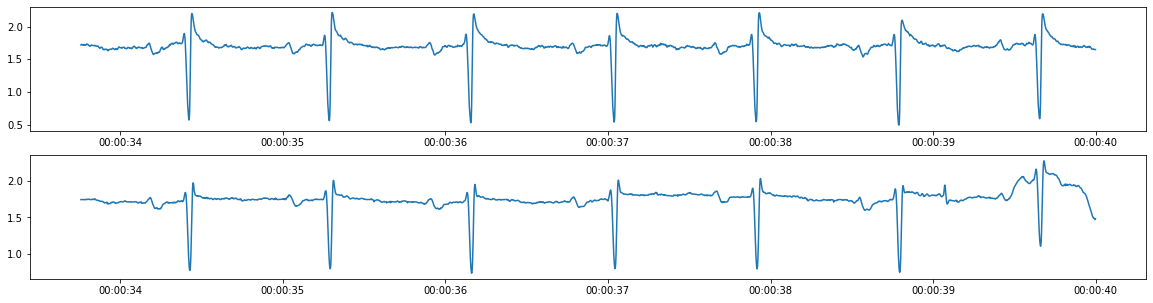

In [88]:
from matplotlib import pyplot as plt

ecg = signals[['ecg:dry', 'ecg:gel']]
plt.figure(figsize=(20, 5))
plt.subplot(211)
plt.plot(ecg['ecg:dry'].head(500*40))
plt.subplot(212)
plt.plot(ecg['ecg:gel'].head(500*40))
plt.show()

We can see the first 40 seconds. There are some interruptions in the edges of the plot.

We can also notice that both channels are upside down, so let's invert them:

/var/folders/1g/sc9mrb8x18s7r9d97p9glqch0000gp/T/ipykernel_57752/766003976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg['ecg:dry'] = -ecg['ecg:dry']
/var/folders/1g/sc9mrb8x18s7r9d97p9glqch0000gp/T/ipykernel_57752/766003976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg['ecg:gel'] = -ecg['ecg:gel']


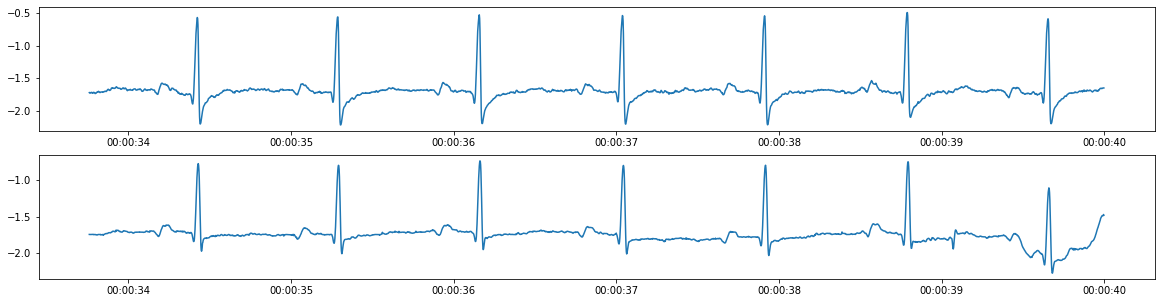

In [89]:
ecg['ecg:dry'] = -ecg['ecg:dry']
ecg['ecg:gel'] = -ecg['ecg:gel']
plt.figure(figsize=(20, 5))
plt.subplot(211)
plt.plot(ecg['ecg:dry'].head(500*40))
plt.subplot(212)
plt.plot(ecg['ecg:gel'].head(500*40))
plt.show()

## 2. Index a Biosignal
Awsome! Let's see the ECG when the subject was lifting a chair. As stated in the article, we should look for `lift` in the activities' column. Mind the comma (,).

/var/folders/1g/sc9mrb8x18s7r9d97p9glqch0000gp/T/ipykernel_57752/1436292906.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ecg_while_lift = ecg[f408_signals['activities'] == 'lift,']


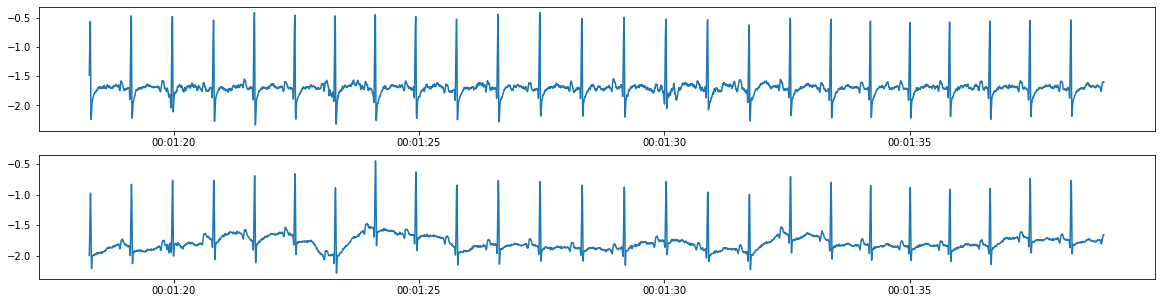

In [90]:
ecg_while_lift = ecg[f408_signals['activities'] == 'lift,']
plt.figure(figsize=(20, 5))
plt.subplot(211)
plt.plot(ecg_while_lift['ecg:dry'])
plt.subplot(212)
plt.plot(ecg_while_lift['ecg:gel'])
plt.show()

## 3. Post-Processing
We can use Pandas and other Python libraries to process our signals!
Let's just get the gel electrodes first to work on that signal only and convert it to a NumPy array:

In [94]:
gel_ecg = ecg_while_lift['ecg:gel'].to_numpy()
gel_ecg.shape

(29900,)

Let's filter the signal wih a simple FIR passband from 2 to 40 Hz:

In [27]:
!pip3 install biosppy

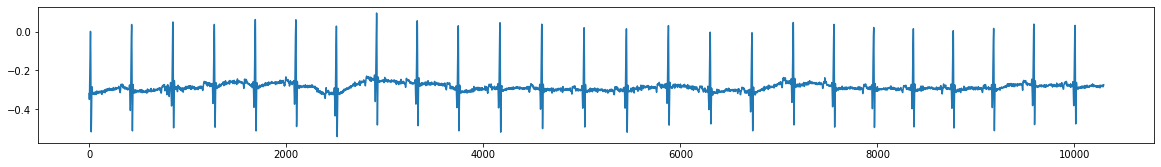

In [96]:
from biosppy.signals.tools import filter_signal

gel_ecg = filter_signal(gel_ecg, 'FIR', 'bandpass', order=20, frequency=(2, 40), sampling_rate=100)['signal']
plt.figure(figsize=(20, 2.5))
plt.plot(gel_ecg)
plt.show()

________
© 2023 ScientISST. All rights reserved.

Notebook offered by the [LTBio team](https://github.com/jomy-kk/LTBio).
Contact: joaomiguelsaraiva@tecnico.ulisboa.pt